In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
# Load the dataset
file_path = r"C:\Users\ravir\Downloads\world_real_estate_data(147k).csv..csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
0,2 room apartment 120 m² in Mediterranean Regio...,Turkey,"Mediterranean Region, Turkey",NaN,5.0,1.0,3.0,2.0,2.0,120 m²,110 m²,315209.0,https://realting.com/uploads/bigSlider/ab3/888...,https://realting.com/property-for-sale/turkey/...
1,"4 room villa 500 m² in Kalkan, Turkey",Turkey,"Kalkan, Mediterranean Region, Kas, Turkey",2021.0,2.0,NaN,NaN,NaN,NaN,500 m²,480 m²,1108667.0,https://realting.com/uploads/bigSlider/87b/679...,https://realting.com/property-for-sale/turkey/...
2,"1 room apartment 65 m² in Antalya, Turkey",Turkey,"Mediterranean Region, Antalya, Turkey",NaN,5.0,2.0,2.0,1.0,1.0,65 m²,60 m²,173211.0,https://realting.com/uploads/bigSlider/030/a11...,https://realting.com/property-for-sale/turkey/...
3,"1 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2020.0,15.0,5.0,2.0,1.0,1.0,NaN,40 m²,99900.0,https://realting.com/uploads/bigSlider/e9a/e06...,https://realting.com/property-for-sale/thailan...
4,"2 room apartment in Pattaya, Thailand",Thailand,"Chon Buri Province, Pattaya, Thailand",2026.0,8.0,3.0,3.0,2.0,1.0,NaN,36 m²,67000.0,https://realting.com/uploads/bigSlider/453/aa2...,https://realting.com/property-for-sale/thailan...


In [25]:
# Get an overview of the dataset
data.info()

# Check for null values
print("\nNull values in each column:")
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147536 entries, 0 to 147535
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   title                       147536 non-null  object 
 1   country                     147406 non-null  object 
 2   location                    147405 non-null  object 
 3   building_construction_year  64719 non-null   float64
 4   building_total_floors       68224 non-null   float64
 5   apartment_floor             54592 non-null   float64
 6   apartment_rooms             74178 non-null   float64
 7   apartment_bedrooms          36982 non-null   float64
 8   apartment_bathrooms         55973 non-null   float64
 9   apartment_total_area        141796 non-null  object 
 10  apartment_living_area       27712 non-null   object 
 11  price_in_USD                144961 non-null  float64
 12  image                       147536 non-null  object 
 13  url           

In [26]:
# Handle missing values (example: drop or fill with mean/median)
data = data.dropna()  # Drops rows with missing values
# Alternatively, you can fill missing values with the mean for numerical columns
# data.fillna(data.mean(), inplace=True)

print("After handling missing values:")
print(data.isnull().sum())


After handling missing values:
title                         0
country                       0
location                      0
building_construction_year    0
building_total_floors         0
apartment_floor               0
apartment_rooms               0
apartment_bedrooms            0
apartment_bathrooms           0
apartment_total_area          0
apartment_living_area         0
price_in_USD                  0
image                         0
url                           0
dtype: int64


In [27]:
# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()

print("Number of rows after removing duplicates:", len(data))


Number of duplicate rows: 0
Number of rows after removing duplicates: 1763


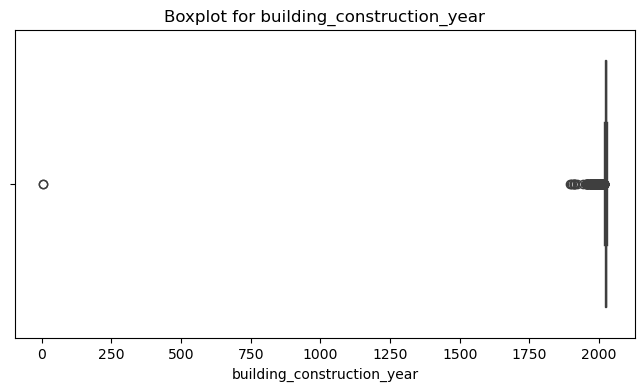

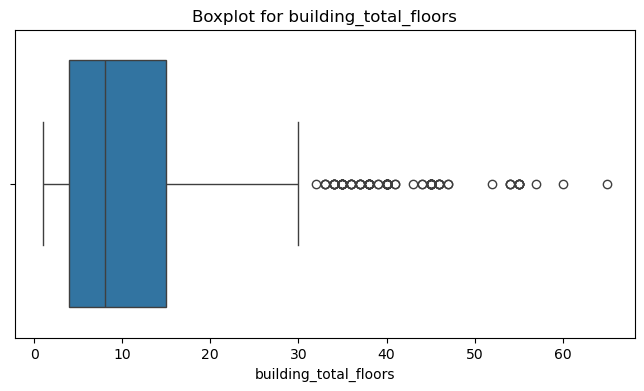

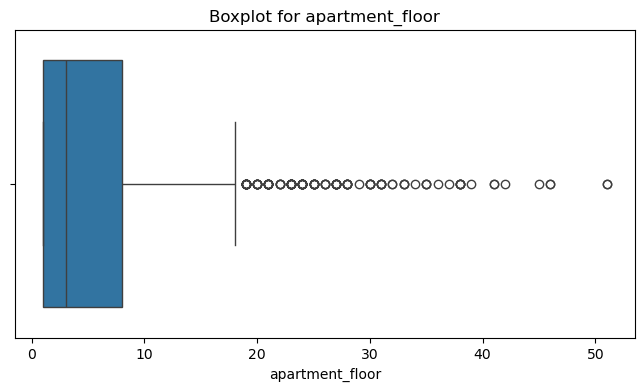

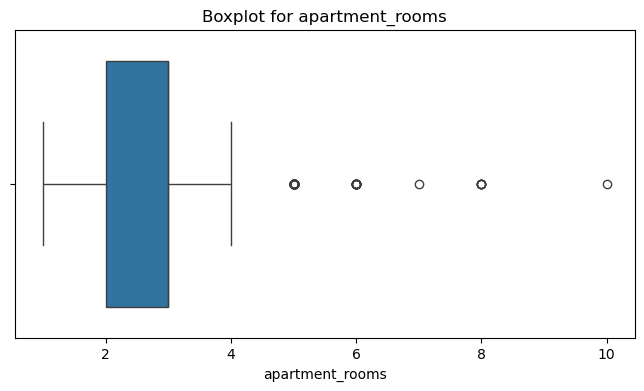

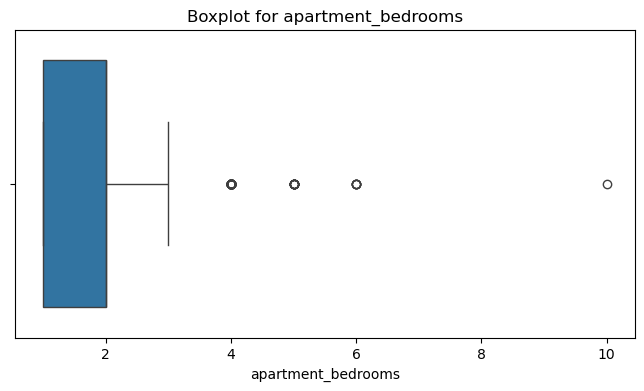

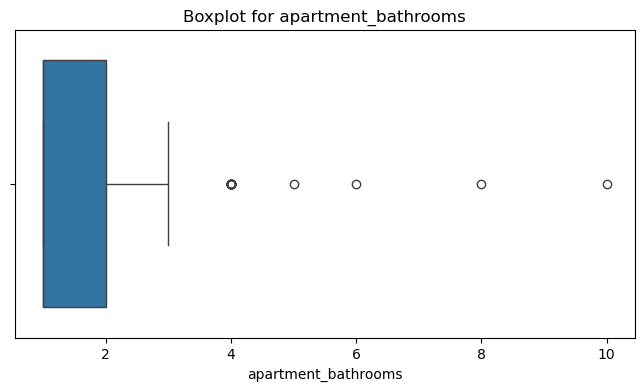

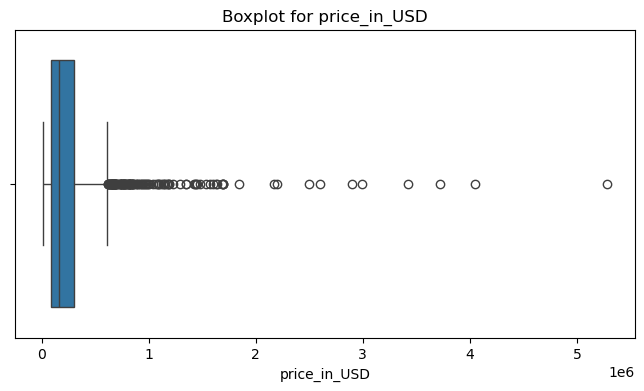

In [28]:
# Visualize outliers (example: Boxplot for numerical columns)
numerical_columns = data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

# Example: Handle outliers using IQR (Interquartile Range)
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Example: Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("Normalized numerical columns:")
data.head()


Normalized numerical columns:


,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
15,"2 room apartment 54 m² in Prague, Czech Republic",Czech Republic,"Prague, Czech Republic",0.6,0.090909,0.066667,1.000000,0.5,0.0,54 m²,54 m²,0.526459,https://realting.com/uploads/bigSlider/08e/1d5...,https://realting.com/property-for-sale/czech-r...
146,"2 room apartment 93 m² in Alanya, Turkey",Turkey,"Mediterranean Region, Sekerhane Mahallesi, Ala...",0.3,0.090909,0.200000,0.666667,0.5,0.0,93 m²,75 m²,0.408634,https://realting.com/uploads/bigSlider/638/7b0...,https://realting.com/property-for-sale/turkey/...
156,"1 room apartment 76 m² in Tashkent, Uzbekistan",Uzbekistan,"Tashkent, Chilanzar District, Uzbekistan",0.8,0.303030,0.466667,0.333333,0.0,0.0,76 m²,44 m²,0.130355,https://realting.com/uploads/bigSlider/276/011...,https://realting.com/uzbekistan/property/1717476
491,"1 room apartment 69 m² in Станишичи, Montenegro",Montenegro,"Станишичи, Budva Municipality, Montenegro",0.6,0.212121,0.266667,0.333333,0.0,0.0,69 m²,49 m²,0.563883,https://realting.com/uploads/bigSlider/96e/d41...,https://realting.com/property-for-sale/montene...
640,"3 room apartment 315 m² in Yoeruekali, Turkey",Turkey,"Yoeruekali, Marmara Region, Mudanya, Turkey",0.5,0.151515,0.000000,1.000000,1.0,0.5,315 m²,280 m²,0.297194,https://realting.com/uploads/bigSlider/43e/766...,https://realting.com/property-for-sale/turkey/...


In [30]:
# Check for categorical columns
categorical_columns = data.select_dtypes(include=[object]).columns
print("Categorical columns:", categorical_columns)

# Example: One-hot encoding for categorical features
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("Data after encoding:")
data.head()


Categorical columns: Index(['title', 'country', 'location', 'apartment_total_area',
       'apartment_living_area', 'image', 'url'],
      dtype='object')
Data after encoding:


,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,price_in_USD,"title_1 room apartment 101 m² in Denpasar, Indonesia","title_1 room apartment 101 m² in Sanur, Indonesia","title_1 room apartment 105 m² in Agaraki, Georgia",...,url_https://realting.com/uzbekistan/property/1717476,url_https://realting.com/uzbekistan/property/1717477,url_https://realting.com/uzbekistan/property/1717478,url_https://realting.com/uzbekistan/property/1717485,url_https://realting.com/uzbekistan/property/1717486,url_https://realting.com/uzbekistan/property/1717488,url_https://realting.com/uzbekistan/property/1717489,url_https://realting.com/uzbekistan/property/1717495,url_https://realting.com/uzbekistan/property/1717509,url_https://realting.com/uzbekistan/property/1739061
15,0.6,0.090909,0.066667,1.000000,0.5,0.0,0.526459,False,False,False,...,False,False,False,False,False,False,False,False,False,False
146,0.3,0.090909,0.200000,0.666667,0.5,0.0,0.408634,False,False,False,...,False,False,False,False,False,False,False,False,False,False
156,0.8,0.303030,0.466667,0.333333,0.0,0.0,0.130355,False,False,False,...,True,False,False,False,False,False,False,False,False,False
491,0.6,0.212121,0.266667,0.333333,0.0,0.0,0.563883,False,False,False,...,False,False,False,False,False,False,False,False,False,False
640,0.5,0.151515,0.000000,1.000000,1.0,0.5,0.297194,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Get basic statistical summary of the dataset
data.describe()


,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,price_in_USD
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.581108,0.244358,0.211251,0.519172,0.351805,0.188917,0.311622
std,0.179553,0.201566,0.250498,0.303083,0.373597,0.268036,0.214350
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.090909,0.000000,0.333333,0.000000,0.000000,0.139122
50%,0.600000,0.181818,0.133333,0.666667,0.500000,0.000000,0.255168
75%,0.700000,0.363636,0.333333,0.666667,0.500000,0.500000,0.440495
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\ravir\AppData\Local\Temp\ipykernel_9512\4282884592.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ravir\AppData\Local\Temp\ipykernel_9512\4282884592.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ravir\AppData\Local\Temp\ipykernel_9512\4282884592.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ravir\AppData\Local\Temp\ipykernel_9512\4282884592.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ravir\AppData\Local\Temp\ipykernel_9512\4282884592.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ravir\AppData\Local\Temp\ipykernel_9512\4282884592.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


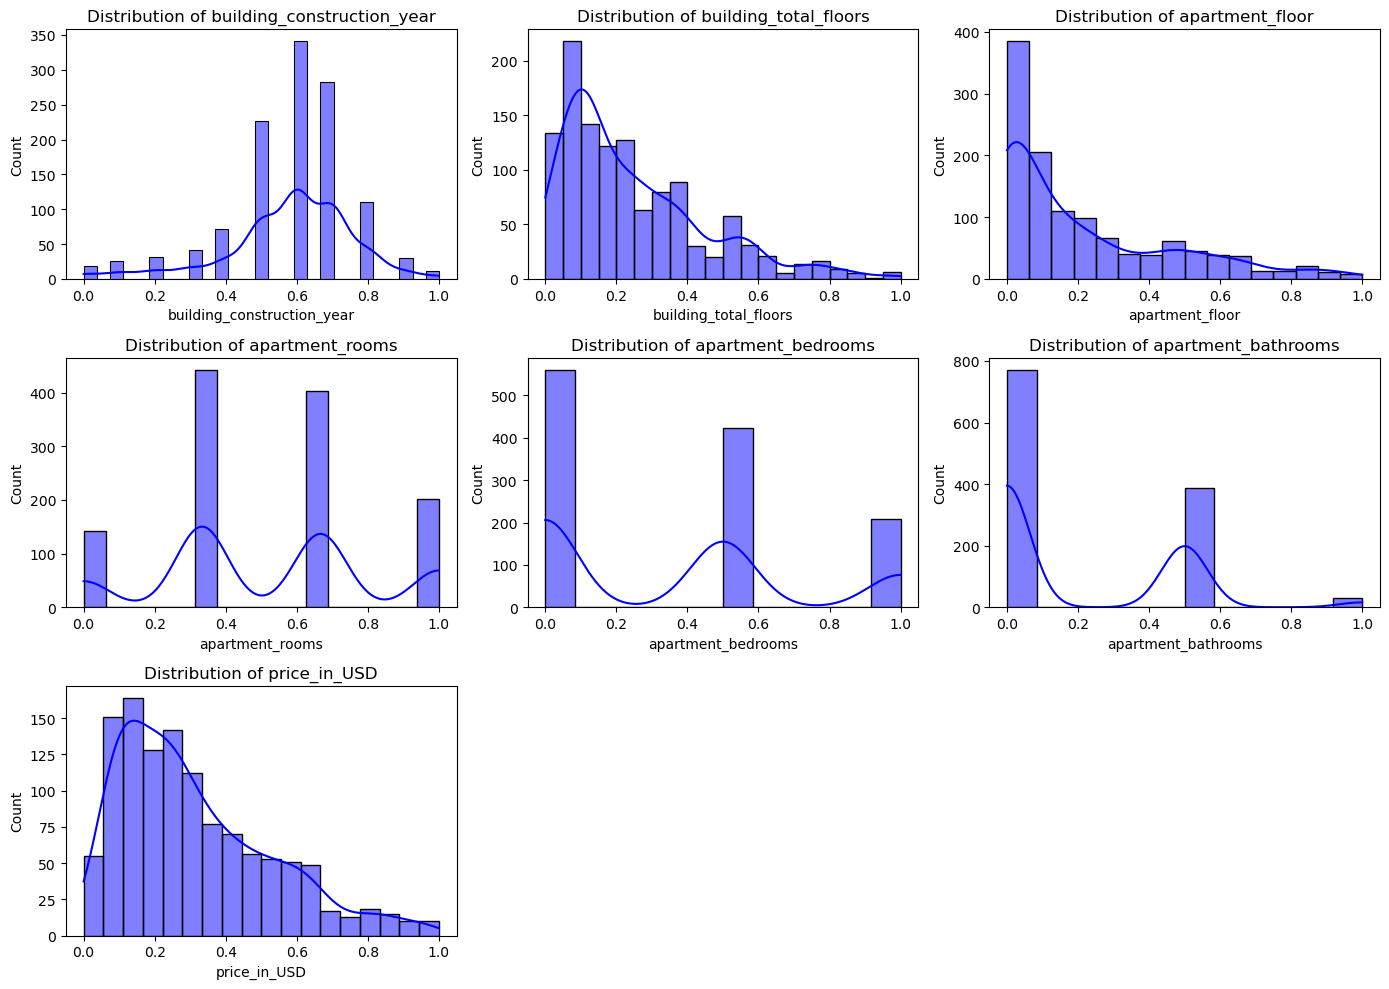

In [32]:
# Select numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Set the plot size and adjust the layout for subplots
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid to fit 7 columns
    sns.histplot(data[column], kde=True, color="blue")
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()

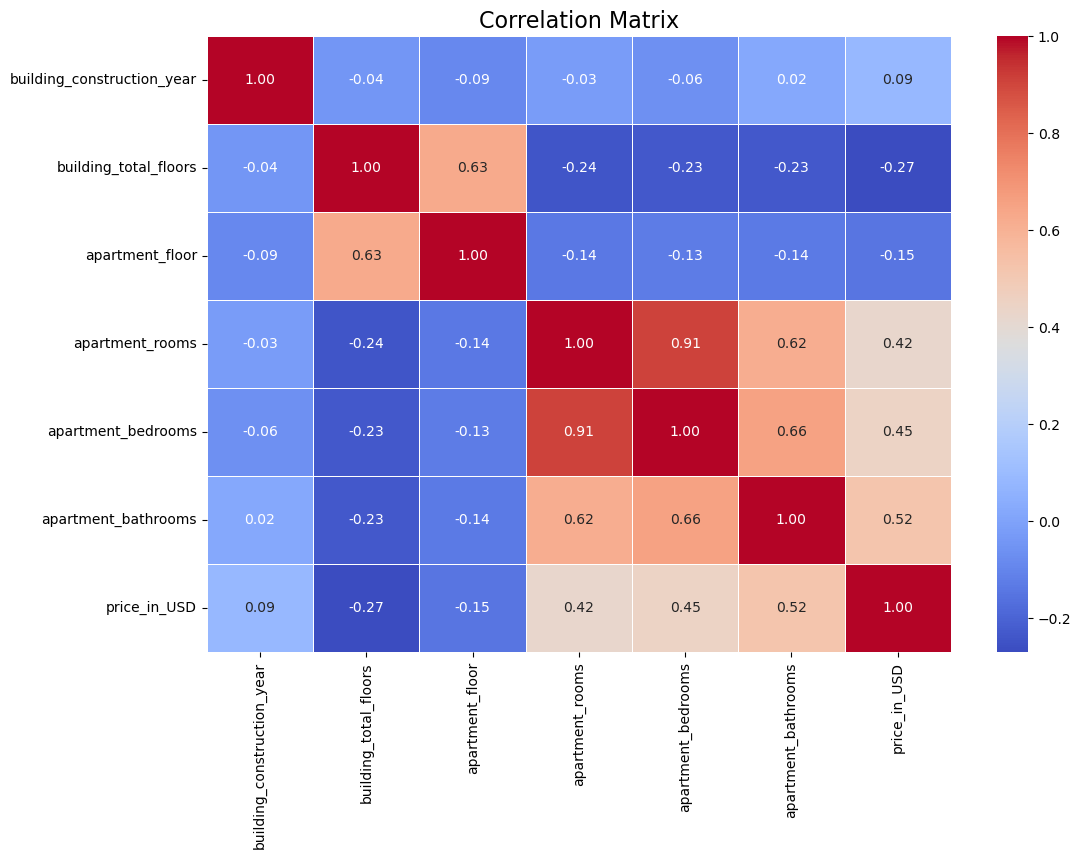

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical features only
correlation_matrix = data[numerical_columns].corr()

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create a heatmap with reduced precision, a better color map, and adjusted settings for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={'size': 10})

# Title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Display the heatmap
plt.show()


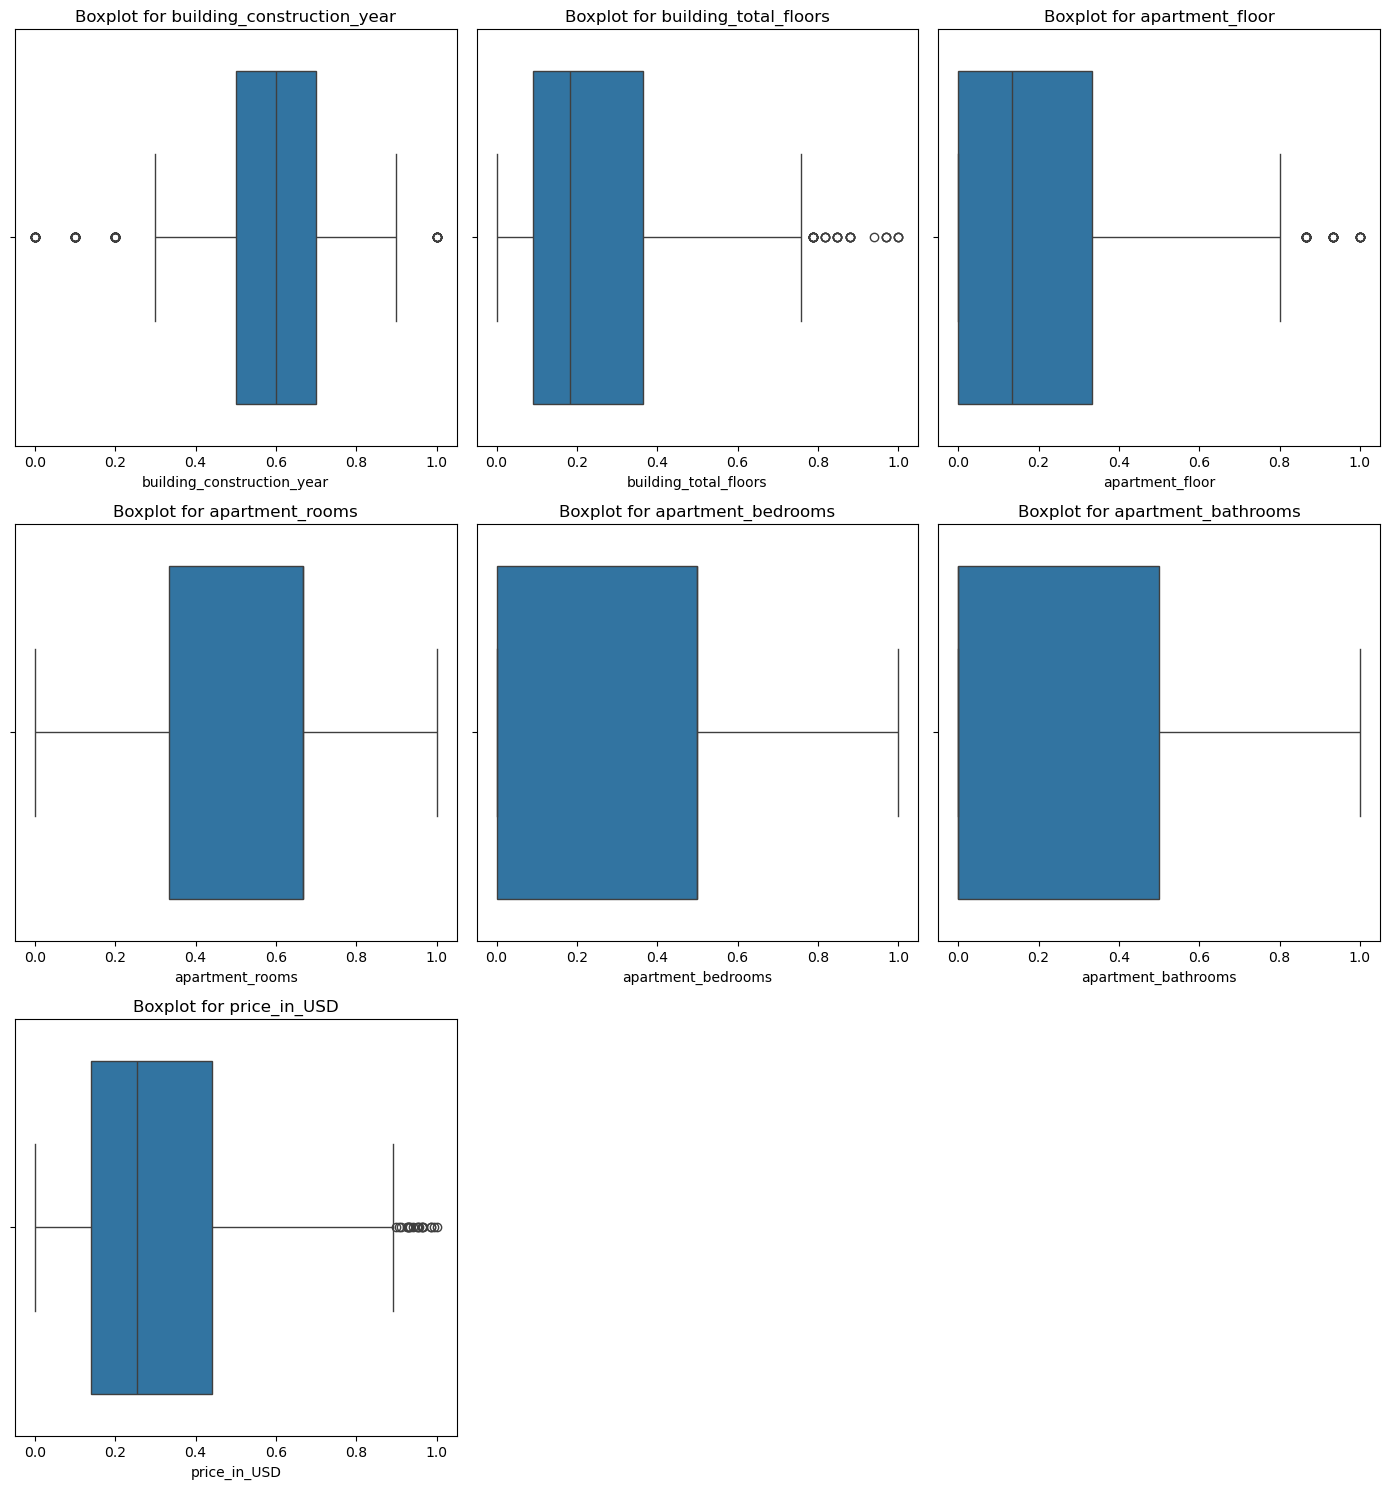

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
# Select only numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Dynamically calculate the number of rows and columns based on the number of numerical columns
num_columns = len(numerical_columns)
n_rows = (num_columns // 3) + (num_columns % 3 > 0)  # Number of rows needed
n_cols = 3  # Keep the number of columns fixed at 3

# Set the figure size for better readability
plt.figure(figsize=(14, n_rows * 5))

# Loop through numerical columns and plot boxplots
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust rows and columns dynamically
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}', fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the boxplots
plt.show()


In [23]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming the data is already loaded into the `data` DataFrame
# Make sure to replace 'price_in_USD' with the actual target column name in your dataset

# Prepare your feature variables (X) and target variable (y)
X = data.drop('price_in_USD', axis=1)  # Replace 'price_in_USD' with the target column name
y = data['price_in_USD']  # Replace 'price_in_USD' with the target column name

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


KeyError: "['price_in_USD'] not found in axis"

In [44]:
# Import the necessary models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}


In [47]:
# Import necessary evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store the performance metrics
model_performance = {}

# Train each model and evaluate performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE manually
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the dictionary
    model_performance[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Display the performance of each model
import pandas as pd
model_performance_df = pd.DataFrame(model_performance).T
print(model_performance_df)


                        MAE       MSE      RMSE        R2
Linear Regression  0.087136  0.016282  0.127601  0.627913
Decision Tree      0.109493  0.030581  0.174875  0.301138
Random Forest      0.092790  0.019670  0.140250  0.550485
Gradient Boosting  0.102285  0.019612  0.140044  0.551808
SVR                0.122055  0.022015  0.148374  0.496904


In [48]:
# Convert the dictionary of model performance into a DataFrame for easy visualization
model_performance_df = pd.DataFrame(model_performance).T

# Display the model performance
print(model_performance_df)


                        MAE       MSE      RMSE        R2
Linear Regression  0.087136  0.016282  0.127601  0.627913
Decision Tree      0.109493  0.030581  0.174875  0.301138
Random Forest      0.092790  0.019670  0.140250  0.550485
Gradient Boosting  0.102285  0.019612  0.140044  0.551808
SVR                0.122055  0.022015  0.148374  0.496904


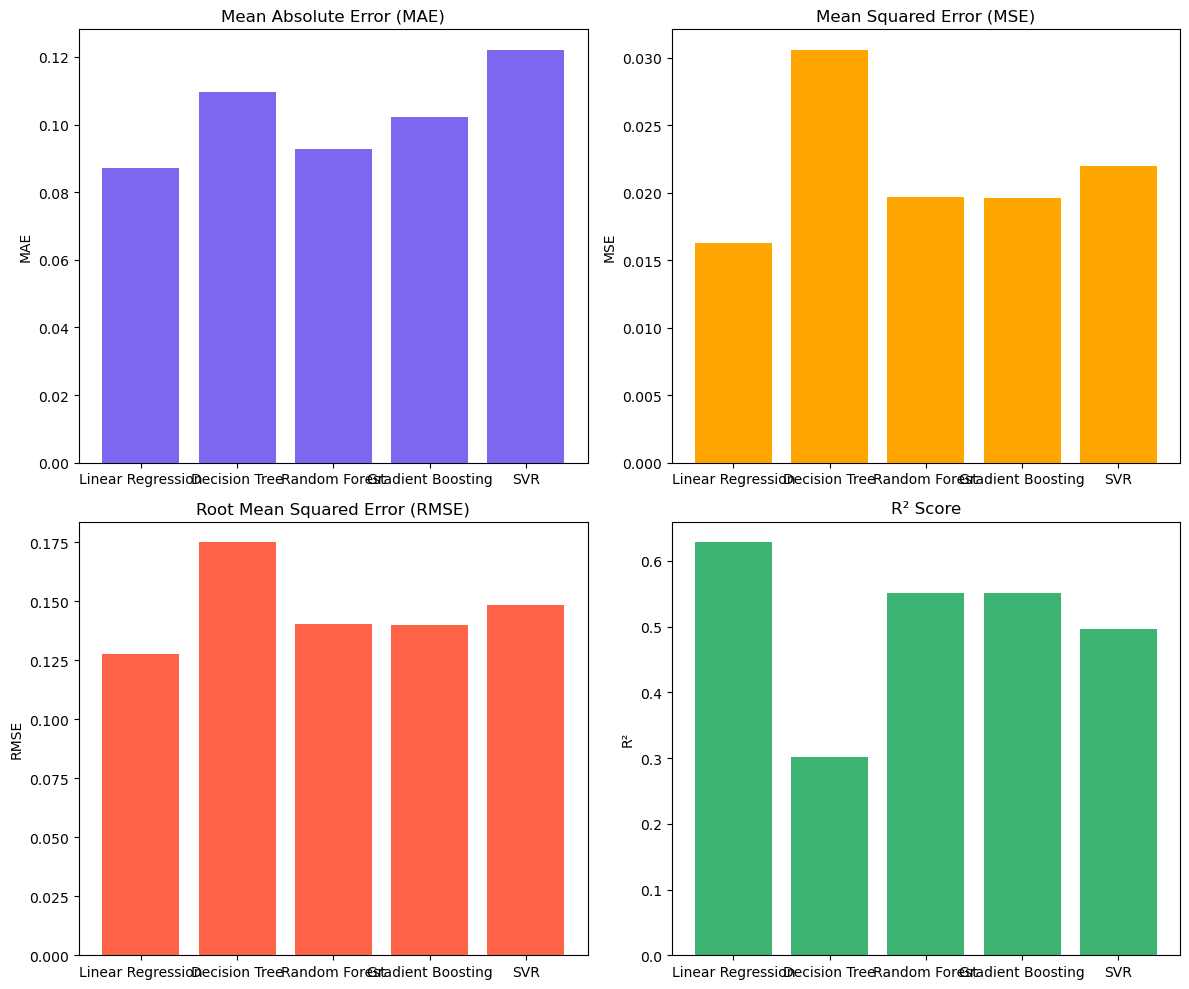

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance data
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR']
mae = [0.087136, 0.109493, 0.092790, 0.102285, 0.122055]
mse = [0.016282, 0.030581, 0.019670, 0.019612, 0.022015]
rmse = [0.127601, 0.174875, 0.140250, 0.140044, 0.148374]
r2 = [0.627913, 0.301138, 0.550485, 0.551808, 0.496904]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# MAE plot
axes[0, 0].bar(models, mae, color='mediumslateblue')
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')

# MSE plot
axes[0, 1].bar(models, mse, color='orange')
axes[0, 1].set_title('Mean Squared Error (MSE)')
axes[0, 1].set_ylabel('MSE')

# RMSE plot
axes[1, 0].bar(models, rmse, color='tomato')
axes[1, 0].set_title('Root Mean Squared Error (RMSE)')
axes[1, 0].set_ylabel('RMSE')

# R² plot
axes[1, 1].bar(models, r2, color='mediumseagreen')
axes[1, 1].set_title('R² Score')
axes[1, 1].set_ylabel('R²')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [57]:
from sklearn.model_selection import GridSearchCV

# Example for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding performance
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best MAE: {-grid_search.best_score_}")


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best MAE: 0.0992771722893052


In [58]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Example for RandomForestRegressor
param_dist = {
    'n_estimators': np.arange(50, 201, 50),  # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of trees
    'min_samples_split': [2, 5, 10]          # Minimum number of samples required to split a node
}

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding performance
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best MAE: {-random_search.best_score_}")


C:\Users\ravir\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': None}
Best MAE: 0.0992771722893052


In [59]:
# Evaluate the best model from GridSearchCV or RandomizedSearchCV on the test set
best_model = grid_search.best_estimator_  # or random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate performance on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Document the results
print("After Hyperparameter Tuning:")
print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")
print(f"Test R-squared: {r2}")


After Hyperparameter Tuning:
Test MAE: 0.09202073176063767
Test MSE: 0.019463642616327142
Test R-squared: 0.5552048005423779


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# Assuming model is already defined (e.g., RandomForestRegressor)
model = RandomForestRegressor(random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Print the cross-validation results
print(f"Cross-validation MAE scores: {-cv_scores}")
print(f"Mean CV MAE: {-np.mean(cv_scores)}")
print(f"Standard Deviation of CV MAE: {np.std(cv_scores)}")


Cross-validation MAE scores: [0.16094673 0.10274081 0.12767012 0.10252606 0.20927995]
Mean CV MAE: 0.14063273217796285
Standard Deviation of CV MAE: 0.04045007853897937


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")
print(f"Test R-squared: {r2}")


Test MAE: 0.09181568004625268
Test MSE: 0.01945239433485109
Test R-squared: 0.5554618532278037


In [65]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


In [68]:
import joblib
# Assuming 'model' is your trained model
model = ...  # Train your model here
# Save the model to the specified directory
joblib.dump(model, 'C:/Users/ravir/Downloads/application/house_price_model.pkl')


['C:/Users/ravir/Downloads/application/house_price_model.pkl']

In [1]:
!pip install requests


In [3]:
import requests
import numpy as np

# Flask API URL
url = "http://127.0.0.1:5000/predict"

# Example feature data (replace with your own features)
features = [
    6.0,    # ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
    15.0,   # INDUS: Proportion of non-retail business acres per town
    0,      # CHAS: Charles River dummy variable (1 if tract bounds river, 0 otherwise)
    50.0,   # NOX: Nitric oxides concentration (parts per 10 million)
    6.5,    # RM: Average number of rooms per dwelling
    45.0,   # AGE: Proportion of owner-occupied units built prior to 1940
    4.0,    # DIS: Weighted distances to five Boston employment centers
    6.0,    # RAD: Index of accessibility to radial highways
    0,      # TAX: Full-value property-tax rate per $10,000
    240,    # PTRATIO: Pupil-teacher ratio by town
    15.0,   # B: 1000(Bk–0.63)² where Bk is the proportion of blacks by town
    300.0,  # LSTAT: % lower status of the population
    6.0,    # Additional features you may have in the model (e.g., feature 1)
    5.0     # Additional features you may have in the model (e.g., feature 2)
]

# Prepare data in JSON format
data = {"features": features}

# Make POST request to the Flask API
response = requests.post(url, json=data)

# Check the response
if response.status_code == 200:
    prediction = response.json()['predicted_price']
    print(f"Predicted House Price: ${prediction * 1000}")
else:
    print("Error:", response.status_code)


Error: 500
